In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import average_precision_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score

In [2]:
df_train = pd.read_csv('Downloads/sign_mnist_train.csv', index_col = False)

In [3]:
df_test = pd.read_csv('Downloads/sign_mnist_test.csv', index_col = False)

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
frames = [df_train,df_test]
frame = pd.concat(frames)

In [6]:
frame = frame.sort_values(by=['label']).reset_index(drop=True)

In [7]:
frame.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,128,130,130,131,131,132,132,134,134,...,199,200,201,199,196,195,194,194,192,191
1,0,197,199,202,203,205,207,209,211,213,...,67,58,218,255,248,249,250,249,250,250
2,0,170,172,172,172,172,172,172,172,173,...,191,193,190,191,191,190,190,190,190,189
3,0,9,61,57,0,0,15,17,24,32,...,64,34,88,151,143,149,153,155,158,161
4,0,154,156,158,159,160,162,163,164,164,...,182,182,181,181,181,181,180,180,180,179


<font size="8">Raw Data</font>

In [8]:
inds = []
labels = []
for i in range(frame.shape[0]):
    for j in range(24):
        if (i not in inds) and (frame.loc[i,'label'] not in labels):
            inds.append(i)
            labels.append(frame.loc[i,'label'])

<Figure size 432x288 with 0 Axes>

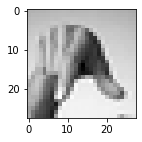

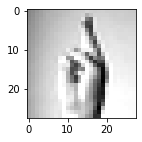

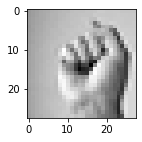

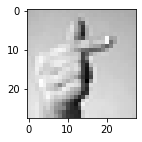

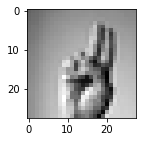

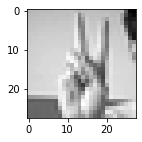

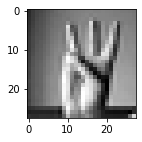

In [9]:
for i in range(15,22):
    arr = np.array(frame.loc[inds[i],:][1:])
    im = arr.reshape(28,28)
    plt.gray()
    plt.figure(figsize=(2,2))
    plt.imshow(im)

In [10]:
X = frame[frame.columns.drop('label')]
Y = frame['label']
X.columns = list(range(784))

In [11]:
neigh = KNeighborsClassifier(n_neighbors=24, weights='uniform', algorithm = 'brute', 
    leaf_size = 30, p=2, metric='minkowski', metric_params=None,  n_jobs=None)

In [12]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test, Y_test)

In [13]:
meta_scores = []
for k in range(2,7):
    scores = []
    kf = KFold(n_splits=k, shuffle=True)
    scores = []
    for train_index, test_index in kf.split(X,Y):
        X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], Y[train_index], Y[test_index]
        scores.append(get_score(neigh,X_train, X_test, Y_train, Y_test))
    meta_scores.append(scores)

<AxesSubplot:>

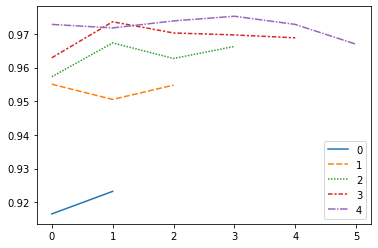

In [14]:
meta_scores = pd.DataFrame(meta_scores)
sns.lineplot(data=meta_scores.T)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size= 0.3, shuffle=True, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

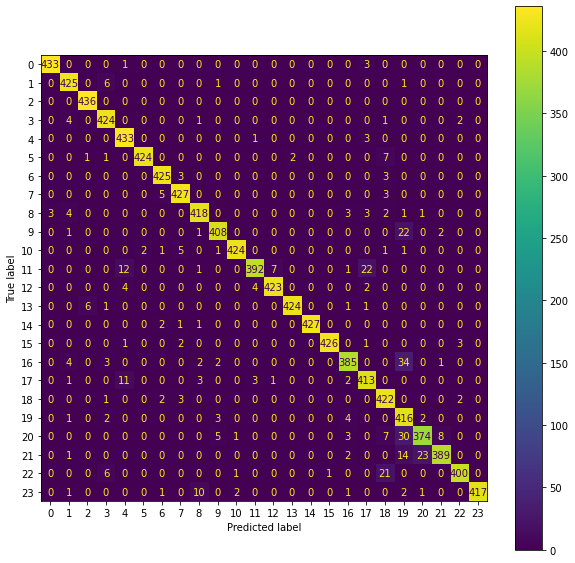

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
disp.plot()
plt.show()

[0.9931192660550459, 0.9615384615384616, 0.9841986455981941, 0.954954954954955, 0.9372294372294372, 0.9953051643192489, 0.9747706422018348, 0.9682539682539683, 0.9565217391304348, 0.9714285714285714, 0.9906542056074766, 0.98, 0.9814385150812065, 0.9953051643192489, 1.0, 0.9976580796252927, 0.9577114427860697, 0.921875, 0.9036402569593148, 0.7984644913627639, 0.9326683291770573, 0.9725, 0.9828009828009828, 1.0]


Text(0, 0.5, 'Accuracy')

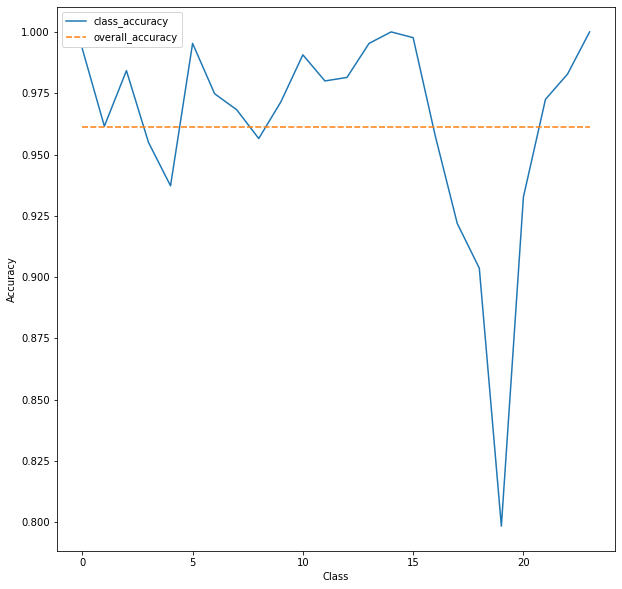

In [17]:
cm_df = pd.DataFrame(cm)
class_score = []

for i in range(24):
    score = cm_df.loc[i,i]/cm_df.sum()[i]
    class_score.append(score)
print(class_score)
       

acc = accuracy_score(Y_test,predictions)
total_acc = [acc for i in range(24)]

scores_df = pd.DataFrame(index = range(24), columns = ['class_accuracy', 'overall_accuracy'] )
scores_df['class_accuracy'] = class_score
scores_df['overall_accuracy'] = total_acc

p = sns.lineplot(data=scores_df)  
p.set_xlabel('Class')
p.set_ylabel('Accuracy')

C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


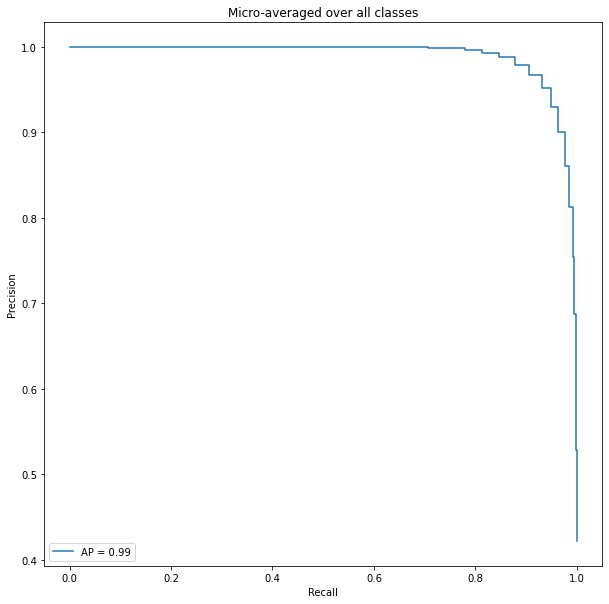

In [18]:
y = label_binarize(Y, classes=list(range(24)))
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = OneVsRestClassifier(make_pipeline(neigh))
classifier.fit(X_train, Y_train)
y_score = classifier.predict_proba(X_test)
                                 

precision = dict()
recall = dict()
average_precision = dict()
for i in range(24):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

<font size="8">Principal Component Analysis</font>

In [19]:
pca = PCA(n_components=784)
pc_components = pca.fit(X)
pc = pd.DataFrame(data = pca.components_)
pc.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.043106,-0.042803,-0.042829,-0.042966,-0.041879,-0.041078,-0.040315,-0.039212,-0.037922,-0.036488,...,-0.030588,-0.032152,-0.034369,-0.034796,-0.034963,-0.035240,-0.034032,-0.032393,-0.030778,-0.029748
1,-0.003825,-0.002561,-0.000290,0.001485,0.003094,0.004758,0.005983,0.007564,0.008340,0.009216,...,-0.087046,-0.102321,-0.108819,-0.109400,-0.108840,-0.106332,-0.102902,-0.099415,-0.096281,-0.093914
2,0.056602,0.053545,0.051830,0.049875,0.045205,0.041552,0.037692,0.032979,0.028579,0.024960,...,-0.017872,-0.017288,-0.016009,-0.018639,-0.026692,-0.031764,-0.033357,-0.035798,-0.039422,-0.041354
3,0.018234,0.018315,0.018212,0.017598,0.017454,0.017194,0.017128,0.017430,0.018005,0.018491,...,0.037288,0.010215,-0.007837,-0.020567,-0.026682,-0.029183,-0.030132,-0.030256,-0.029786,-0.028200
4,0.005108,0.006556,0.005749,0.006552,0.009408,0.010869,0.013440,0.015848,0.017027,0.017471,...,-0.056501,-0.026260,0.014073,0.038091,0.047334,0.052539,0.059243,0.066774,0.070438,0.073529


In [20]:
scaler = StandardScaler()
X_transform= pca.fit_transform(X)
df_new = pd.DataFrame(data = X_transform)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,271.200511,-378.096082,317.640340,-485.337629,71.477875,-212.358595,36.967997,175.301526,-76.106556,-56.066374,...,-0.097181,-0.015127,1.183782,0.472597,0.052903,0.396130,-0.524929,0.388509,0.076287,0.330992
1,-1269.471771,78.942902,27.238967,25.204386,734.501109,-52.274548,106.083690,166.652669,-74.699512,-261.453637,...,-0.307441,0.811763,0.180951,-0.172131,-0.522493,0.589697,0.544145,0.281073,0.113744,0.176393
2,-136.329232,-146.704392,170.718802,-344.135051,47.309388,-215.562213,-34.232411,48.523003,-247.456302,111.625703,...,-0.218485,-0.174507,-0.185385,0.044424,-0.555243,-0.502036,0.284793,0.152224,-0.167248,-0.280248
3,2233.134494,-390.891441,-573.042288,-201.594602,407.266609,-83.009313,159.029246,145.358320,50.321644,120.136992,...,-0.916293,-0.590064,-0.674924,-0.595831,1.345328,0.702558,-0.902220,0.382983,-0.368895,-0.180808
4,178.778232,-245.912921,215.227396,-194.672556,162.561359,-132.087872,74.208778,46.576216,-223.091826,98.819724,...,0.506815,0.319771,-0.047854,-0.068810,0.186906,0.352079,0.066253,0.292447,-0.141937,0.076758


In [21]:
df_new['label'] = Y

<Figure size 720x720 with 0 Axes>

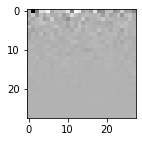

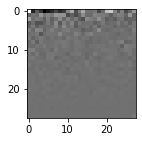

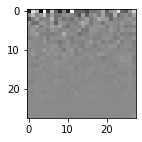

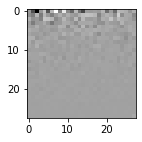

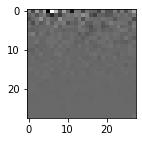

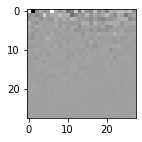

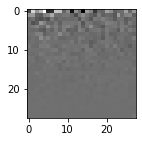

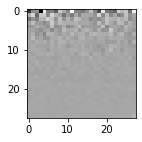

In [22]:
for i in range(16,24):
    arr = np.array(df_new.loc[inds[i],:][1:])
    im = arr.reshape(28,28)
    plt.gray()
    plt.figure(figsize=(2,2))
    plt.imshow(im)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, stratify=Y, test_size= 0.3, shuffle=True, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

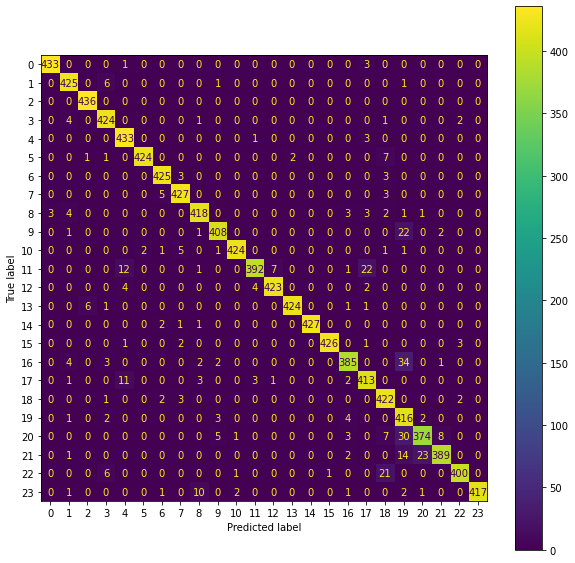

In [24]:
plt.rcParams["figure.figsize"] = (10,10)
disp.plot()
plt.show()

In [25]:
cm_df = pd.DataFrame(cm)
class_score = []

for i in range(24):
    score = cm_df.loc[i,i]/cm_df.sum()[i]
    class_score.append(score)
print(class_score)
print(accuracy_score(Y_test,predictions))

[0.9931192660550459, 0.9615384615384616, 0.9841986455981941, 0.954954954954955, 0.9372294372294372, 0.9953051643192489, 0.9747706422018348, 0.9682539682539683, 0.9565217391304348, 0.9714285714285714, 0.9906542056074766, 0.98, 0.9814385150812065, 0.9953051643192489, 1.0, 0.9976580796252927, 0.9577114427860697, 0.921875, 0.9036402569593148, 0.7984644913627639, 0.9326683291770573, 0.9725, 0.9828009828009828, 1.0]
0.9611127153720281


In [26]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(X)
X_red = pd.DataFrame(X_red)

In [27]:
X_red.columns = ['x','y'] 
x = X_red['x']
y = X_red['y']
X_red['label'] = Y

<AxesSubplot:xlabel='x', ylabel='y'>

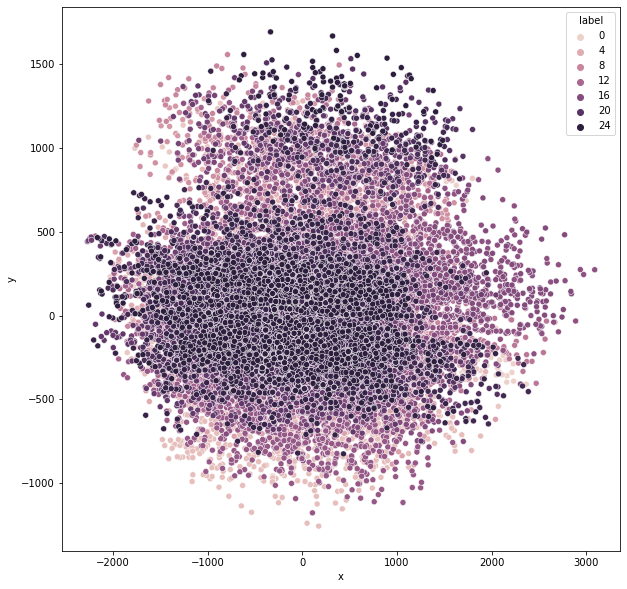

In [28]:
sns.scatterplot(data=X_red, x='x', y='y', hue="label")

In [29]:
pca = PCA(0.95)
X_red = pca.fit_transform(X)
X_red = pd.DataFrame(X_red)

<AxesSubplot:>

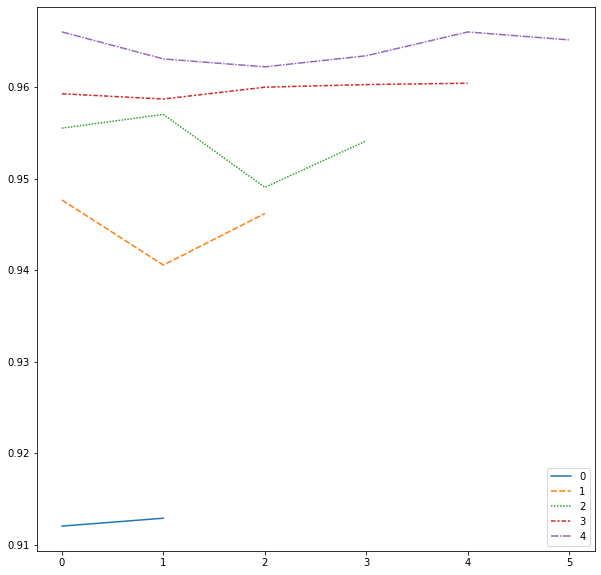

In [30]:
meta_scores = []
for k in range(2,7):
    scores = []
    kf = KFold(n_splits=k, shuffle=True)
    scores = []
    for train_index, test_index in kf.split(X_red,Y):
        X_train, X_test, Y_train, Y_test = X_red.iloc[train_index], X_red.iloc[test_index], Y[train_index], Y[test_index]
        scores.append(get_score(neigh,X_train, X_test, Y_train, Y_test))
    meta_scores.append(scores)

meta_scores = pd.DataFrame(meta_scores)
sns.lineplot(data=meta_scores.T)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_red, Y, stratify=Y, test_size= 0.3, shuffle=True, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

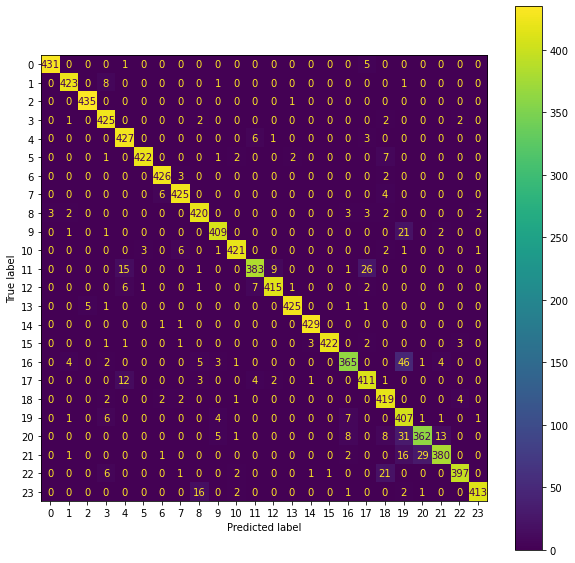

In [32]:
plt.rcParams["figure.figsize"] = (10,10)
disp.plot()
plt.show()

In [33]:
cm_df = pd.DataFrame(cm)
class_score = []

for i in range(24):
    score = cm_df.loc[i,i]/cm_df.sum()[i]
    class_score.append(score)
print(class_score)
print(accuracy_score(Y_test,predictions))

[0.9930875576036866, 0.976905311778291, 0.9886363636363636, 0.9381898454746137, 0.9242424242424242, 0.9906103286384976, 0.9770642201834863, 0.9681093394077449, 0.9375, 0.964622641509434, 0.9790697674418605, 0.9575, 0.9718969555035128, 0.9906759906759907, 0.988479262672811, 0.9976359338061466, 0.9407216494845361, 0.9072847682119205, 0.8952991452991453, 0.7752380952380953, 0.9187817258883249, 0.95, 0.9778325123152709, 0.9904076738609112]
0.952160939455193


Text(0, 0.5, 'Accuracy')

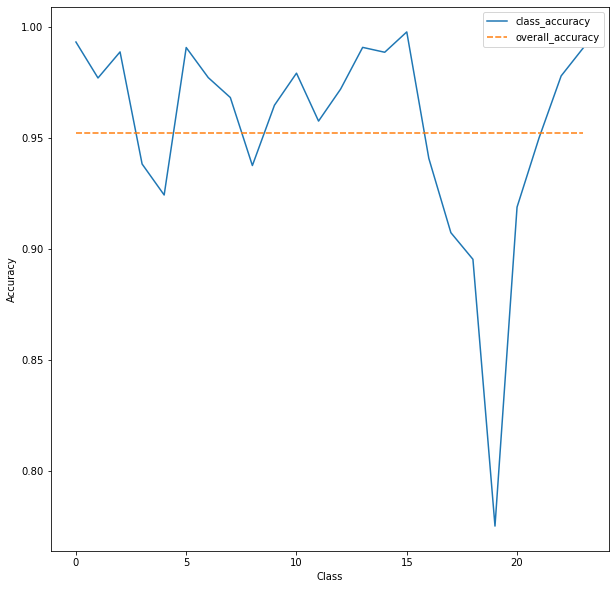

In [34]:
acc = accuracy_score(Y_test,predictions)
total_acc = [acc for i in range(24)]

scores_df = pd.DataFrame(index = range(24), columns = ['class_accuracy', 'overall_accuracy'] )
scores_df['class_accuracy'] = class_score
scores_df['overall_accuracy'] = total_acc

p = sns.lineplot(data=scores_df)  
p.set_xlabel('Class')
p.set_ylabel('Accuracy')

C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


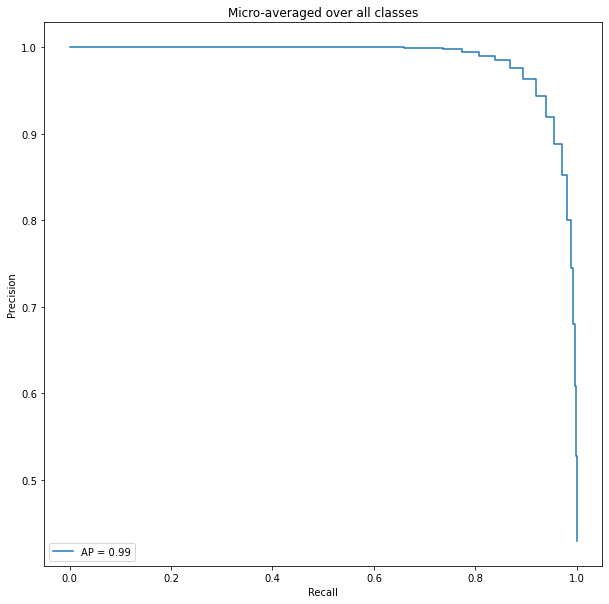

In [35]:
y = label_binarize(Y, classes=list(range(24)))
X_train, X_test, Y_train, Y_test = train_test_split(X_red, y, test_size=0.3, random_state=42)

classifier = OneVsRestClassifier(make_pipeline(neigh))
classifier.fit(X_train, Y_train)
y_score = classifier.predict_proba(X_test)
                                 

precision = dict()
recall = dict()
average_precision = dict()
for i in range(24):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

<font size="6">Kernel Principal Component Analysis</font>

In [36]:
inds = np.arange(0,34620,10)
X_r = X.iloc[inds]
Y_r = Y[inds]

transformer = KernelPCA(n_components = 115, kernel='cosine')
X_kernel = transformer.fit_transform(X_r)
X_kernel = pd.DataFrame(data = X_kernel)


<AxesSubplot:>

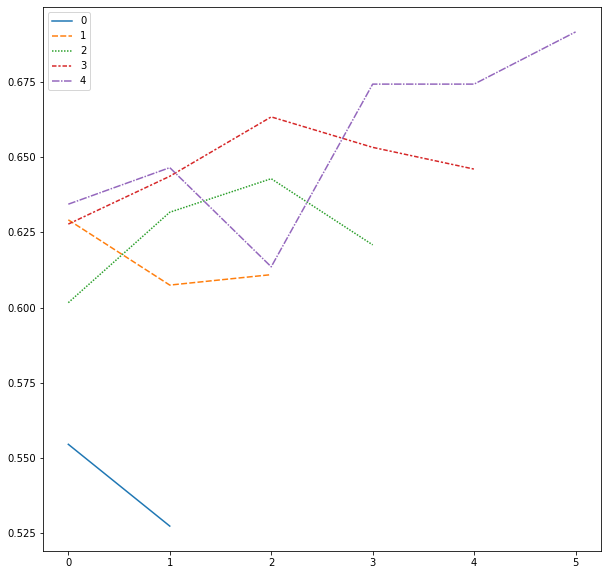

In [37]:
meta_scores = []
for k in range(2,7):
    scores = []
    kf = KFold(n_splits=k, shuffle=True)
    scores = []
    for train_index, test_index in kf.split(X_kernel,Y_r.reset_index(drop=True)):
        X_train, X_test, Y_train, Y_test = X_kernel.iloc[train_index], X_kernel.iloc[test_index], Y_r.reset_index(drop=True)[train_index], Y_r.reset_index(drop=True)[test_index]
        scores.append(get_score(neigh,X_train, X_test, Y_train, Y_test))
    meta_scores.append(scores)

meta_scores = pd.DataFrame(meta_scores)
sns.lineplot(data=meta_scores.T)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_kernel, Y_r, stratify=Y_r, test_size= 0.3, shuffle=True, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

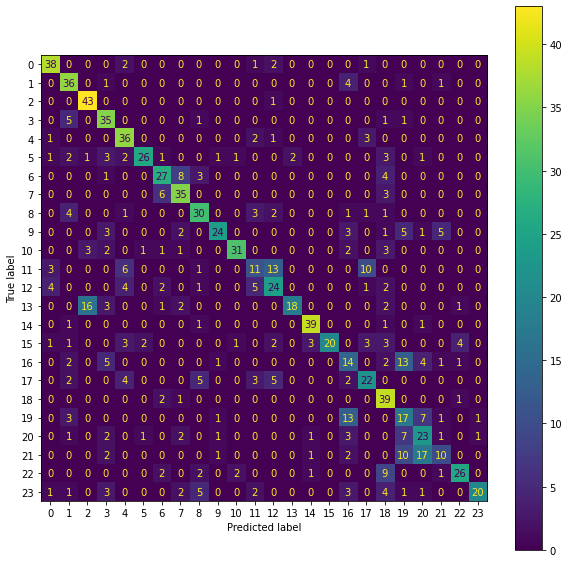

In [39]:
plt.rcParams["figure.figsize"] = (10,10)
disp.plot()
plt.show()

In [40]:
cm_df = pd.DataFrame(cm)
class_score = []

for i in range(24):
    score = cm_df.loc[i,i]/cm_df.sum()[i]
    class_score.append(score)
print(class_score)
print(accuracy_score(Y_test,predictions))

[0.7755102040816326, 0.6206896551724138, 0.6825396825396826, 0.5833333333333334, 0.6206896551724138, 0.8666666666666667, 0.6428571428571429, 0.660377358490566, 0.6122448979591837, 0.8275862068965517, 0.8857142857142857, 0.4074074074074074, 0.48, 0.9, 0.8666666666666667, 1.0, 0.2978723404255319, 0.5365853658536586, 0.5, 0.3090909090909091, 0.41818181818181815, 0.5, 0.7878787878787878, 0.9090909090909091]
0.6198267564966313


Text(0, 0.5, 'Accuracy')

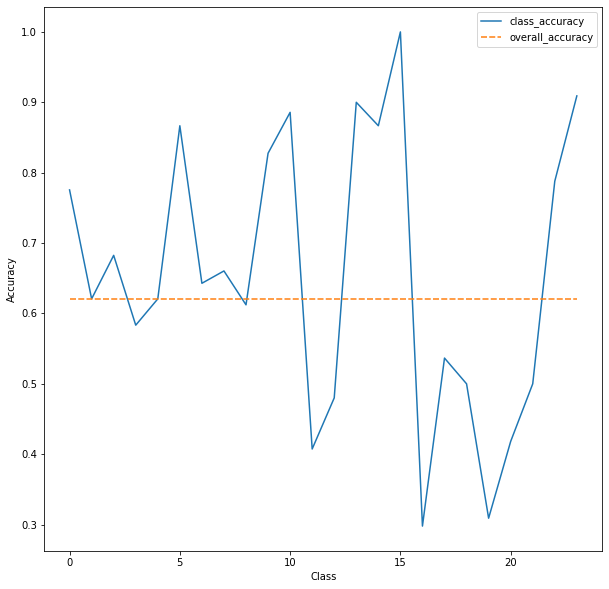

In [41]:
acc = accuracy_score(Y_test,predictions)
total_acc = [acc for i in range(24)]

scores_df = pd.DataFrame(index = range(24), columns = ['class_accuracy', 'overall_accuracy'] )
scores_df['class_accuracy'] = class_score
scores_df['overall_accuracy'] = total_acc

kernel_scores_df = scores_df
p = sns.lineplot(data=scores_df)  
p.set_xlabel('Class')
p.set_ylabel('Accuracy')

C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


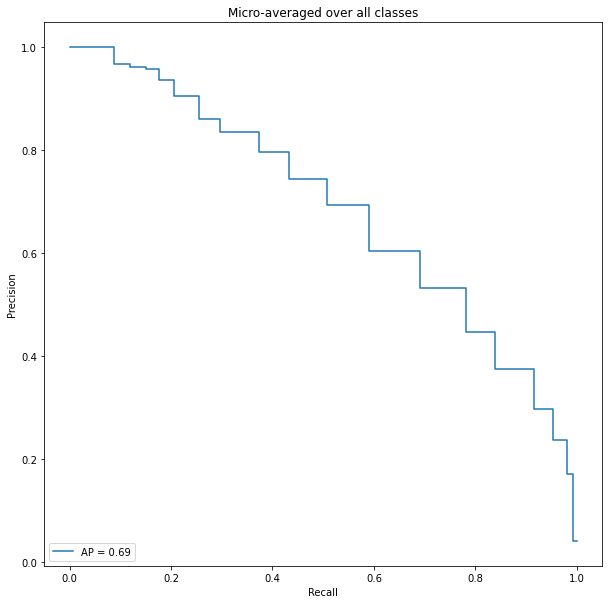

In [42]:
y = label_binarize(Y_r.reset_index(drop=True), classes=list(range(24)))
X_train, X_test, Y_train, Y_test = train_test_split(X_kernel, y, test_size=0.3, random_state=42)

classifier = OneVsRestClassifier(make_pipeline(neigh))
classifier.fit(X_train, Y_train)
y_score = classifier.predict_proba(X_test)
                                 

precision = dict()
recall = dict()
average_precision = dict()
for i in range(24):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

<font size="6">Spectral Embedding w/ Laplacian Eigenmaps</font>

In [43]:
inds = np.arange(0,34620,10)
X_r = X.iloc[inds]
Y_r = Y[inds]
X_r.shape

(3462, 784)

In [44]:
embedding = SpectralEmbedding(n_components = 115)
X_spec = embedding.fit_transform(X_r)
X_spec = pd.DataFrame(data = X_spec)

<AxesSubplot:>

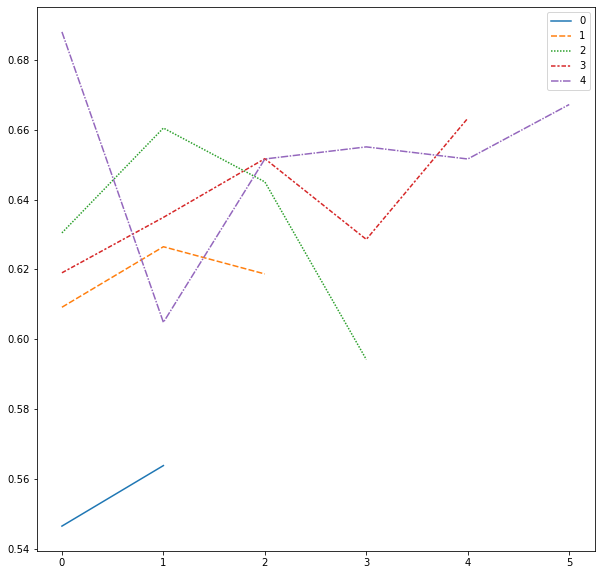

In [45]:
meta_scores = []
for k in range(2,7):
    scores = []
    kf = KFold(n_splits=k, shuffle=True)
    scores = []
    for train_index, test_index in kf.split(X_spec,Y_r.reset_index(drop=True)):
        X_train, X_test, Y_train, Y_test = X_kernel.iloc[train_index], X_kernel.iloc[test_index], Y_r.reset_index(drop=True)[train_index], Y_r.reset_index(drop=True)[test_index]
        scores.append(get_score(neigh,X_train, X_test, Y_train, Y_test))
    meta_scores.append(scores)

meta_scores = pd.DataFrame(meta_scores)
sns.lineplot(data=meta_scores.T)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_spec, Y_r, stratify=Y_r, test_size= 0.3, shuffle=True, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

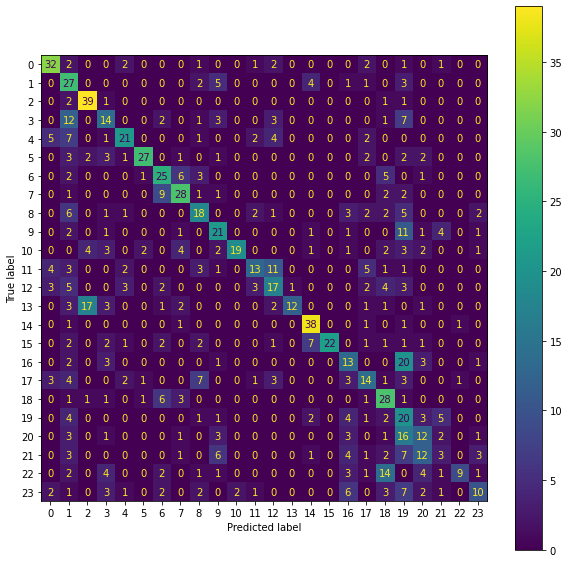

In [47]:
plt.rcParams["figure.figsize"] = (10,10)
disp.plot()
plt.show()

In [48]:
cm_df = pd.DataFrame(cm)
class_score = []

for i in range(24):
    score = cm_df.loc[i,i]/cm_df.sum()[i]
    class_score.append(score)
print(class_score)
print(accuracy_score(Y_test,predictions))

[0.6530612244897959, 0.2755102040816326, 0.6190476190476191, 0.34146341463414637, 0.6176470588235294, 0.84375, 0.49019607843137253, 0.5833333333333334, 0.4186046511627907, 0.45652173913043476, 0.9047619047619048, 0.5652173913043478, 0.38636363636363635, 0.9230769230769231, 0.7037037037037037, 1.0, 0.30952380952380953, 0.3783783783783784, 0.39436619718309857, 0.17391304347826086, 0.2727272727272727, 0.17647058823529413, 0.8181818181818182, 0.5]
0.4639076034648701


Text(0, 0.5, 'Accuracy')

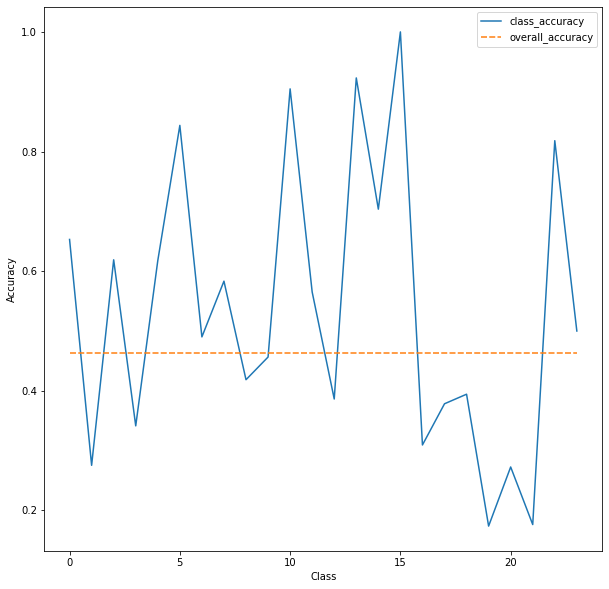

In [49]:
acc = accuracy_score(Y_test,predictions)
total_acc = [acc for i in range(24)]

scores_df = pd.DataFrame(index = range(24), columns = ['class_accuracy', 'overall_accuracy'] )
scores_df['class_accuracy'] = class_score
scores_df['overall_accuracy'] = total_acc
spec_scores_df = scores_df
p = sns.lineplot(data=scores_df)  
p.set_xlabel('Class')
p.set_ylabel('Accuracy')

C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


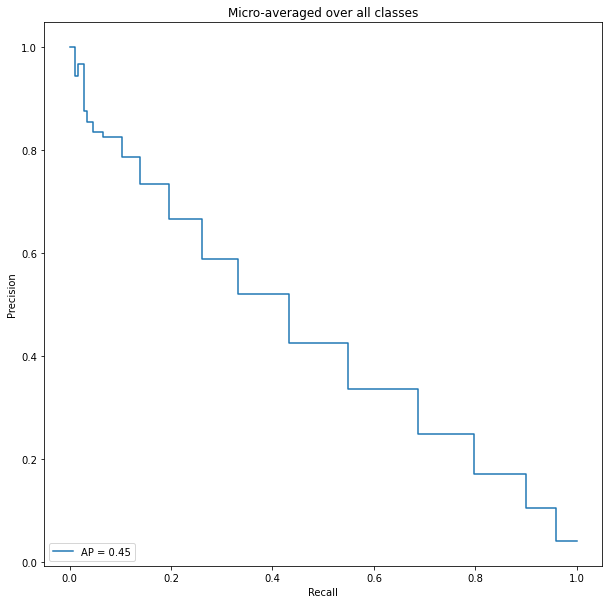

In [50]:
y = label_binarize(Y_r.reset_index(drop=True), classes=list(range(24)))
X_train, X_test, Y_train, Y_test = train_test_split(X_spec, y, test_size=0.3, random_state=42)

classifier = OneVsRestClassifier(make_pipeline(neigh))
classifier.fit(X_train, Y_train)
y_score = classifier.predict_proba(X_test)
                                 

precision = dict()
recall = dict()
average_precision = dict()
for i in range(24):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

<font size="4">Compare PCA with Kernel PCA & Spectral Embedding</font>

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_red.iloc[inds], Y_r, stratify=Y_r, test_size= 0.3, shuffle=True, random_state=42)
neigh.fit(X_train,Y_train)

predictions = neigh.predict(X_test)
cm = confusion_matrix(Y_test, predictions)

In [52]:
cm_df = pd.DataFrame(cm)
class_score = []

for i in range(24):
    score = cm_df.loc[i,i]/cm_df.sum()[i]
    class_score.append(score)
print(class_score)
print(accuracy_score(Y_test,predictions))

[0.6923076923076923, 0.532258064516129, 0.7636363636363637, 0.4925373134328358, 0.74, 0.7714285714285715, 0.5818181818181818, 0.7333333333333333, 0.5333333333333333, 0.6666666666666666, 0.8333333333333334, 0.5806451612903226, 0.627906976744186, 0.8, 0.65625, 1.0, 0.36363636363636365, 0.3611111111111111, 0.45588235294117646, 0.30303030303030304, 0.4, 0.5, 0.8, 1.0]
0.5976900866217517


Text(0, 0.5, 'Accuracy')

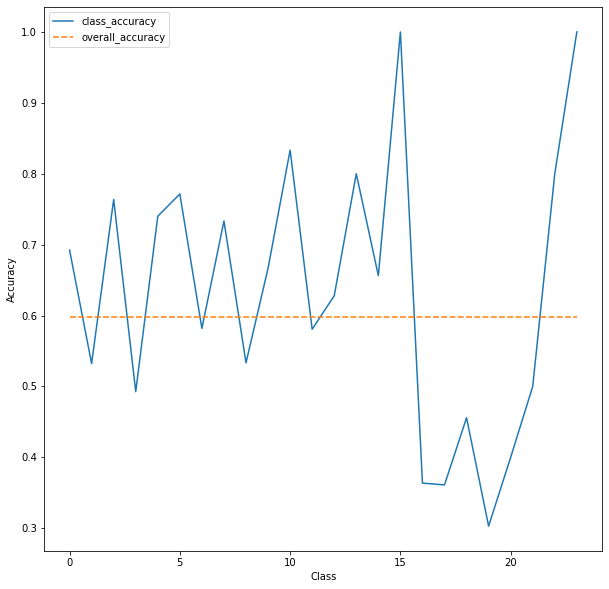

In [53]:
acc = accuracy_score(Y_test,predictions)
total_acc = [acc for i in range(24)]

scores_df = pd.DataFrame(index = range(24), columns = ['class_accuracy', 'overall_accuracy'] )
scores_df['class_accuracy'] = class_score
scores_df['overall_accuracy'] = total_acc
pca_scores_df = scores_df
p = sns.lineplot(data=scores_df)  
p.set_xlabel('Class')
p.set_ylabel('Accuracy')

C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Keyon\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


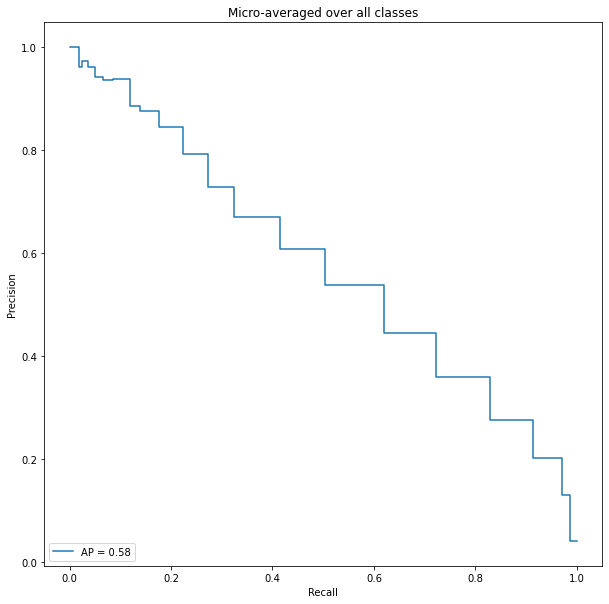

In [54]:
y = label_binarize(Y_r.reset_index(drop=True), classes=list(range(24)))
X_train, X_test, Y_train, Y_test = train_test_split(X_red.iloc[inds].reset_index(drop=True), y, test_size=0.3, random_state=42)

classifier = OneVsRestClassifier(make_pipeline(neigh))
classifier.fit(X_train, Y_train)
y_score = classifier.predict_proba(X_test)
                                 

precision = dict()
recall = dict()
average_precision = dict()
for i in range(24):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

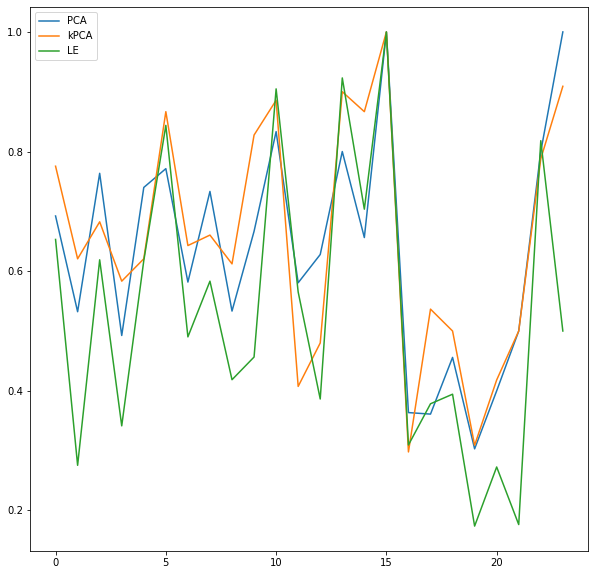

In [55]:
plt.plot(pca_scores_df['class_accuracy'], label='PCA')
plt.plot(kernel_scores_df['class_accuracy'], label='kPCA')
plt.plot(spec_scores_df['class_accuracy'], label='LE')
plt.legend()
plt.show()

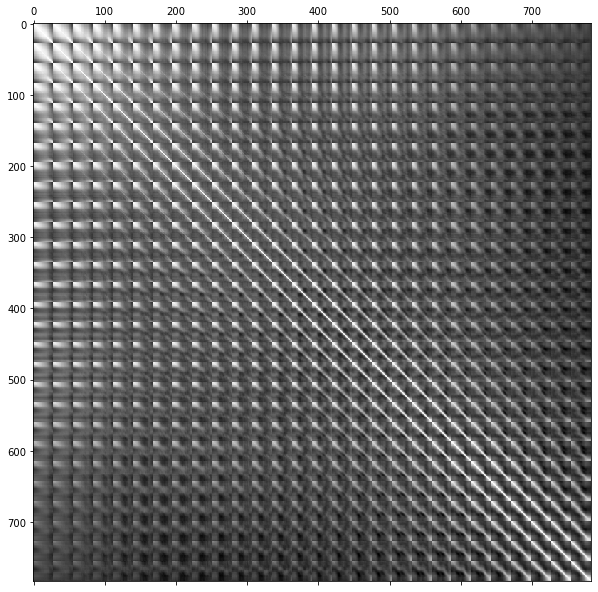

In [57]:
plt.matshow(X.corr())
plt.show()